In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyodbc as db 
conn = db.connect('DRIVER={SQL Server};'
                        'SERVER=137.116.139.217;'
                        'DATABASE=ARCHIVESKF;'
                        'UID=sa;PWD=erp@123')


data = pd.read_sql_query("""
        select executivename,item.brand,cast(isnull(sum(QTYSHIPPED),
0)/1000 as int) as ItemSales from
(select * from GPMExecutive_ShortName where gpmname= 'Mr. A. K. M. Nawajesh Hossain') as Exe
left join
 (select * from prinfoskf ) as item
on item.cp01=exe.[ExecutiveName]
left join 
(select  * from oesalesdetails) as Sale
on sale.item=item.itemno
 group by item.brand,executivename
                            """, conn)

In [46]:
data.columns

Index(['executivename', 'brand', 'ItemSales'], dtype='object')

In [ ]:
data.head()

In [ ]:
data1 = data 
data1.groupby(by="executivename")
data1

In [ ]:
print(data1.loc[data1['executivename'] == 'Mr. Ahmed Wassel Rafi'])

In [ ]:
for name in len(range(data1.executivename)):
    print(executivename[name])

In [47]:



zeroTothree = data['0 - 3 days'].values.tolist()
fourToten = data['4 - 10 days'].values.tolist()
elevenTofifteen = data['11 - 15 days'].values.tolist()
sixteenplus = data['16+ days'].values.tolist()

branch_names=data['Branch'].values.tolist()

result_list=[]
for p,q,r,s in zip(zeroTothree,fourToten,elevenTofifteen,sixteenplus):
    list1=[p,q,r,s]
    result_list.append(list1)
#print(result_list)

totals = [i + j + k + l
              for i, j, k, l in zip(data['0 - 3 days'],
                                    data['4 - 10 days'],
                                    data['11 - 15 days'],
                                    data['16+ days'])]
all_zero_seven = [i / j * 100 for i, j in zip(data['0 - 3 days'], totals)]
all_eight_fourteen = [i / j * 100 for i, j in zip(data['4 - 10 days'], totals)]
all_fifteen_twentyone = [i / j * 100 for i, j in zip(data['11 - 15 days'], totals)]
all_twentytwo_twentyeight = [i / j * 100 for i, j in zip(data['16+ days'], totals)]

max_value=max(totals)

label_list=[]
for t,u,v,w in zip(all_zero_seven,all_eight_fourteen,all_fifteen_twentyone,all_twentytwo_twentyeight):
    list2=[t,u,v,w]
    label_list.append(list2)
#print(label_list)

category_names = ['0 - 3 days', '4 - 10 days',
                  '11 - 15 days', '16+ days']
results = result_list

def survey(results, category_names):
    labels = branch_names
    data = np.array(results)
    width_data=np.array(label_list)
    data_cum = data.cumsum(axis=1)
    # category_colors = plt.get_cmap('RdYlGn')(
    #     np.linspace(0.15, 0.85, data.shape[1]))
    category_colors =['#31C377', '#F4B300', '#ff4d4d', '#cc0000']
    fig, ax = plt.subplots(figsize=(12.8, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

#     for i, (colname, color) in enumerate(zip(category_names, category_colors)):
#         widths = data[:, i]
#         #print(widths)
#         main_width=width_data[:,i]
#         #print(main_width)
#         starts = data_cum[:, i] - widths
#         ax.barh(labels, widths, left=starts, height=.7,
#                 label=colname, color=color)
#         xcenters = starts + widths / 2


        # r, g, b, _ = color
#         text_color = 'black' #if r * g * b < 0.5 else 'darkgrey'
#         for y, (x, c) in enumerate(zip(xcenters, main_width)):
#             ax.text(x, y, str(round(c,1))+'%', ha='center', va='center',fontsize=8,
#                     color=text_color)
    # ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
    #           loc='lower center', fontsize='small')
    #plt.xticks(np.arange(0, max_value, 10), fontsize='9')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025),
                   fancybox=True, shadow=True, ncol=7)
    plt.title('6. Branch Wise Matured Credit', fontsize=16, fontweight='bold', color='#3E0A75')
    plt.tight_layout()


    return fig, ax


survey(results, category_names)

plt.show()


,executivename,brand,ItemSales
0,Dr. Mir Tanvir Ahmed,Dinafex,1051
1,Dr. Mir Tanvir Ahmed,Tojak,180
2,Mr. Ahmed Wassel Rafi,Dorenta,889
3,Mr. Ahmed Wassel Rafi,Fenobac,96
4,Mr. Ahmed Wassel Rafi,Kynol,0


In [58]:
data1 = data 
data1.groupby(by="executivename")
data1

,executivename,brand,ItemSales
0,Dr. Mir Tanvir Ahmed,Dinafex,1051
1,Dr. Mir Tanvir Ahmed,Tojak,180
2,Mr. Ahmed Wassel Rafi,Dorenta,889
3,Mr. Ahmed Wassel Rafi,Fenobac,96
4,Mr. Ahmed Wassel Rafi,Kynol,0
5,Mr. Ahmed Wassel Rafi,Nabumet,398
6,Mr. Ahmed Wassel Rafi,Oradin,1582
7,Mr. Ahmed Wassel Rafi,Xenthol,53
8,Mr. Farhan Ahmed,Etorix,4061
9,Mr. Farhan Ahmed,Geminox,0


In [52]:
print(data1.loc[data1['executivename'] == 'Mr. Ahmed Wassel Rafi'])

           executivename    brand  ItemSales
2  Mr. Ahmed Wassel Rafi  Dorenta        889
3  Mr. Ahmed Wassel Rafi  Fenobac         96
4  Mr. Ahmed Wassel Rafi    Kynol          0
5  Mr. Ahmed Wassel Rafi  Nabumet        398
6  Mr. Ahmed Wassel Rafi   Oradin       1582
7  Mr. Ahmed Wassel Rafi  Xenthol         53


In [57]:
for name in len(range(data1.executivename)):
    print(executivename[name])

TypeError: 'Series' object cannot be interpreted as an integer

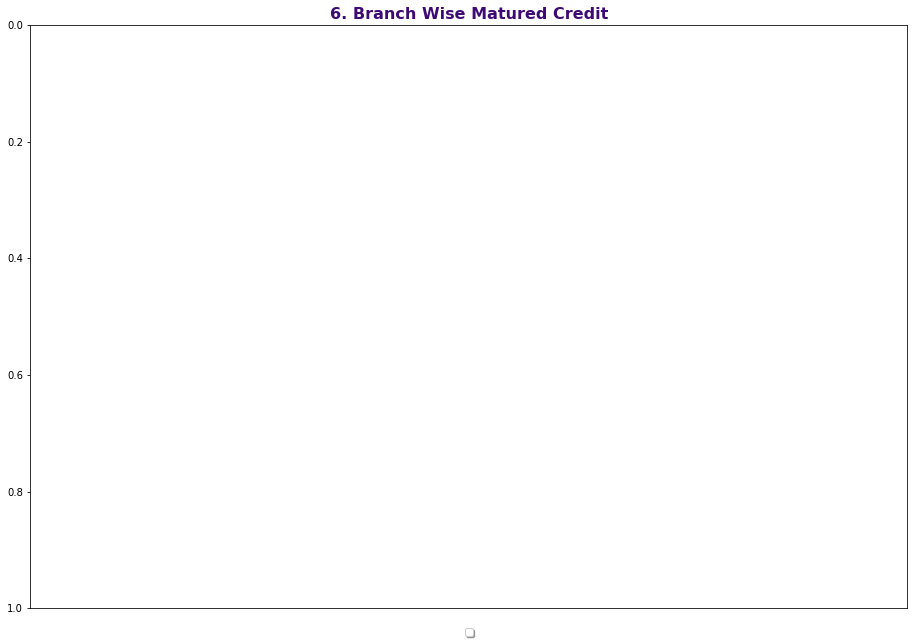

In [8]:



zeroTothree = data['0 - 3 days'].values.tolist()
fourToten = data['4 - 10 days'].values.tolist()
elevenTofifteen = data['11 - 15 days'].values.tolist()
sixteenplus = data['16+ days'].values.tolist()

branch_names=data['Branch'].values.tolist()

result_list=[]
for p,q,r,s in zip(zeroTothree,fourToten,elevenTofifteen,sixteenplus):
    list1=[p,q,r,s]
    result_list.append(list1)
#print(result_list)

totals = [i + j + k + l
              for i, j, k, l in zip(data['0 - 3 days'],
                                    data['4 - 10 days'],
                                    data['11 - 15 days'],
                                    data['16+ days'])]
all_zero_seven = [i / j * 100 for i, j in zip(data['0 - 3 days'], totals)]
all_eight_fourteen = [i / j * 100 for i, j in zip(data['4 - 10 days'], totals)]
all_fifteen_twentyone = [i / j * 100 for i, j in zip(data['11 - 15 days'], totals)]
all_twentytwo_twentyeight = [i / j * 100 for i, j in zip(data['16+ days'], totals)]

max_value=max(totals)

label_list=[]
for t,u,v,w in zip(all_zero_seven,all_eight_fourteen,all_fifteen_twentyone,all_twentytwo_twentyeight):
    list2=[t,u,v,w]
    label_list.append(list2)
#print(label_list)

category_names = ['0 - 3 days', '4 - 10 days',
                  '11 - 15 days', '16+ days']
results = result_list

def survey(results, category_names):
    labels = branch_names
    data = np.array(results)
    width_data=np.array(label_list)
    data_cum = data.cumsum(axis=1)
    # category_colors = plt.get_cmap('RdYlGn')(
    #     np.linspace(0.15, 0.85, data.shape[1]))
    category_colors =['#31C377', '#F4B300', '#ff4d4d', '#cc0000']
    fig, ax = plt.subplots(figsize=(12.8, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

#     for i, (colname, color) in enumerate(zip(category_names, category_colors)):
#         widths = data[:, i]
#         #print(widths)
#         main_width=width_data[:,i]
#         #print(main_width)
#         starts = data_cum[:, i] - widths
#         ax.barh(labels, widths, left=starts, height=.7,
#                 label=colname, color=color)
#         xcenters = starts + widths / 2


        # r, g, b, _ = color
#         text_color = 'black' #if r * g * b < 0.5 else 'darkgrey'
#         for y, (x, c) in enumerate(zip(xcenters, main_width)):
#             ax.text(x, y, str(round(c,1))+'%', ha='center', va='center',fontsize=8,
#                     color=text_color)
    # ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
    #           loc='lower center', fontsize='small')
    #plt.xticks(np.arange(0, max_value, 10), fontsize='9')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025),
                   fancybox=True, shadow=True, ncol=7)
    plt.title('6. Branch Wise Matured Credit', fontsize=16, fontweight='bold', color='#3E0A75')
    plt.tight_layout()


    return fig, ax


survey(results, category_names)

plt.show()
